# April 8, 2024 Eclipse - Data from ARM's Southern Great Plains (SGP) Observatory

The 2024 solar eclipse was an exciting event that saw roughly 90% coverage at ARM's SGP observatory.  The large array of instrumentation at the site provides a unique view into the atmospheric impacts of the eclipse.  This notebook gathers a few of the instruments together for a close look at the data during the event.

## Step 1: Import our libraries

In [316]:
import act
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Step 2: Download data!
If you have not used the ARM Live webservice before, please take a moment to check it out and login (https://adc.arm.gov/armlive/).  Please insert your own username and token after you log in below.

For this case, we're going to look at a few different instruments and download the data using ACT.

### Instruments
#### Doppler Lidar (DL)
The doppler lidar measures radial velocity and can be used to observe vertical air motion.

#### Solar and Infrared Radiation Station (SIRS)
SIRS provides continuous measurements of broadband shortwave and longwave irradiances.

#### Surface Meteorological Station (MET)
The MET system measures basic surface meteorology like air temperature and wind speeds.

#### Eddy Correlation Flux Measurement System (ECOR)
The eddy correlation (ECOR) flux measurement system provides half-hour measurements of the surface turbulent fluxes of momentum, sensible heat, latent heat, and carbon dioxide.

#### Radar Wind Profiler (RWP)
The RWP transmits electromagnetic energy into the atmosphere in as many as five directions (four tilted in opposing vertical planes and on vertical) and measures the strength and frequency of backscattered energy. Calculation of the Doppler shift of the returned signal allows calculation of the atmospheric wind profile.

#### Ultrafine Condensation Particle Counter (CPCUF)
Depending on the CPC type, typical CPC instruments can count particles with sizes that range from 3 to 3000 nanometers (ultrafine CPC) or from 10 to 3000 nanometers (fine CPC). The CPC is part of the aerosol observing system (AOS).

#### Scanning Mobility Particle Sizer
The scanning mobility particle sizer (SMPS) is a particle size spectrometer that measures the aerosol number size distribution by sizing particles based on their electrical mobility diameter using a differential mobility analyzer (DMA) and by counting particles using a condensation particle counter (CPC). 

* Some descriptions taken from the www.arm.gov instrument webpages.

In [351]:
# Set your username and token here!
username = 'YourUserName'
token = 'YourToken'

# Set the datastream and start/enddates for the DL data
datastream = 'sgpdlfptE13.b1'
startdate = '2024-04-08T17:00:00'
enddate = '2024-04-08T21:00:00'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
dl_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_dl = act.io.read_arm_netcdf(dl_files)
ds_dl = ds_dl.where(ds_dl.range < 1500, drop=True)

# Now download the rest of the data!
startdate = '2024-04-08'
enddate = '2024-04-08'
datastream = 'sgpecorsfE14.b1'
ecor_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_ecor = act.io.read_arm_netcdf(ecor_files)

datastream = 'sgpmetE13.b1'
met_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_met = act.io.read_arm_netcdf(met_files)

datastream = 'sgpsirsE13.b1'
sirs_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_sirs = act.io.read_arm_netcdf(sirs_files)

datastream = 'sgpaoscpcufE13.b1'
cpcuf_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_cpcuf = act.io.read_arm_netcdf(cpcuf_files)

datastream = 'sgpaossmpsE13.b1'
smps_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_smps = act.io.read_arm_netcdf(smps_files)

datastream = 'sgp915rwpwindmomloC1.a0'
rwp_files = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_rwp = act.io.read_arm_netcdf(rwp_files)

[DOWNLOADING] sgpdlfptE13.b1.20240408.190019.cdf
[DOWNLOADING] sgpdlfptE13.b1.20240408.180018.cdf
[DOWNLOADING] sgpdlfptE13.b1.20240408.200019.cdf
[DOWNLOADING] sgpdlfptE13.b1.20240408.170018.cdf

If you use these data to prepare a publication, please cite:

Newsom, R., Shi, Y., & Krishnamurthy, R. Doppler Lidar (DLFPT). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1025185

[DOWNLOADING] sgpecorsfE14.b1.20240408.000000.nc

If you use these data to prepare a publication, please cite:

Sullivan, R., Cook, D., Shi, Y., Keeler, E., & Pal, S. Eddy Correlation Flux
Measurement System (ECORSF). Atmospheric Radiation Measurement (ARM) User
Facility. https://doi.org/10.5439/1494128

[DOWNLOADING] sgpmetE13.b1.20240408.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1786358

[D

### Step 2.1: Transform the RWP dataset for easy plotting

In [352]:
# Select the first mode and beam to plot up
ds_rwp = ds_rwp.where(ds_rwp.beam_azimuth == 104)
ds_rwp = ds_rwp.where(ds_rwp.signal_to_noise_ratio > -10)

## Step 3: Visualize the Data
Let's plot out the data using ACT's built in functionality.  It's easy to change variables around if you want to look at more data.  Note that we are applying a day/night background and the vertical dashed line is local solar noon.

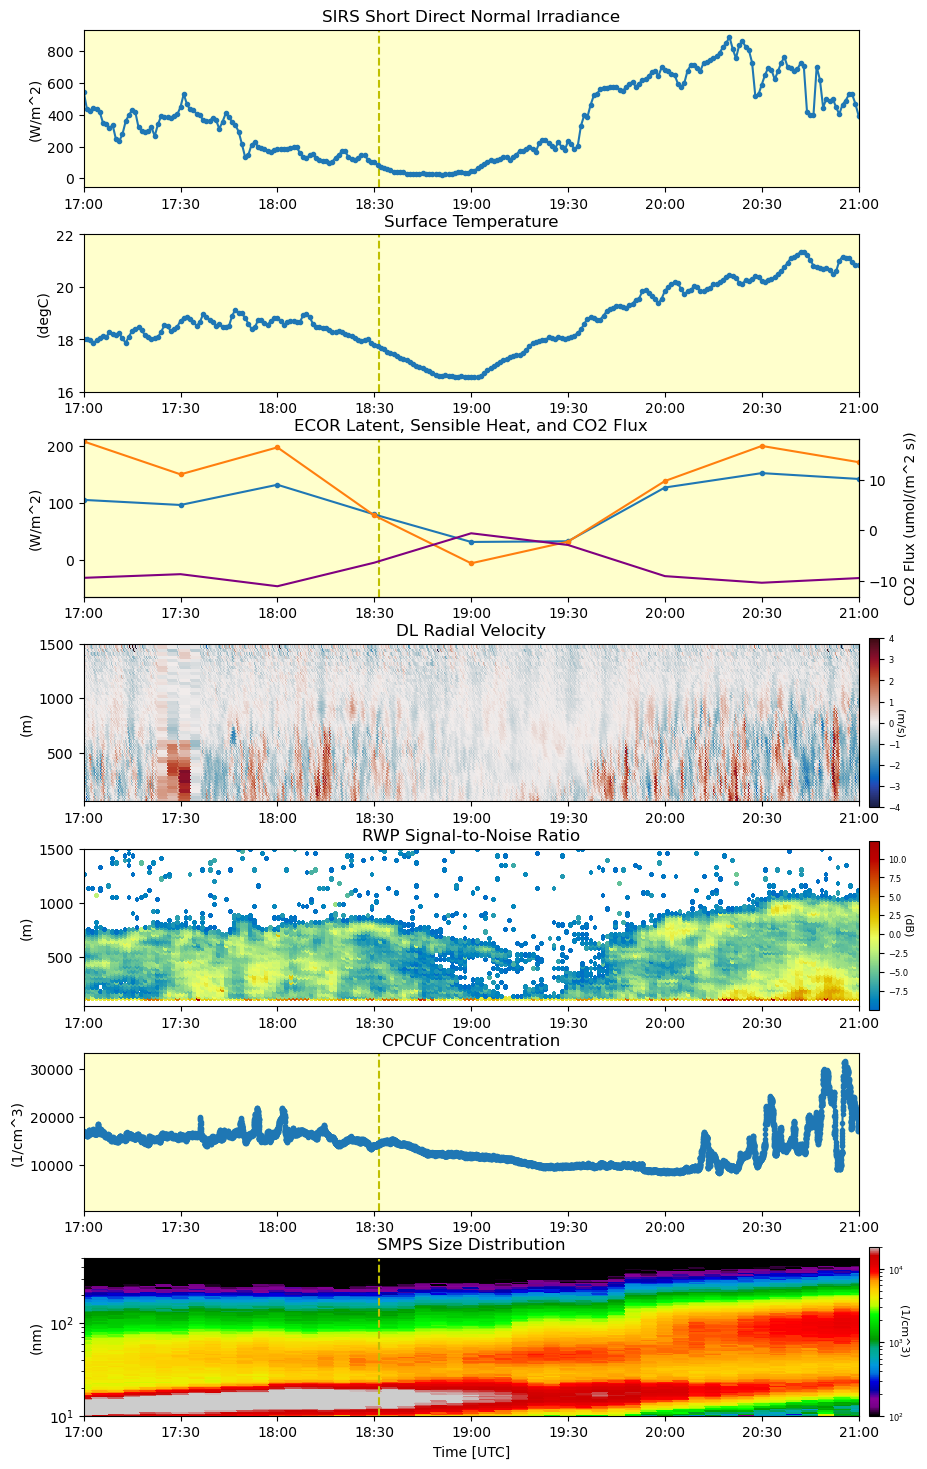

In [353]:
# Set up the plot
display = act.plotting.TimeSeriesDisplay(
    {
        'DL': ds_dl,
        'SIRS': ds_sirs,
        'MET': ds_met,
        'ECOR': ds_ecor,
        'CEIL': ds_ceil,
        'CPCUF': ds_cpcuf,
        'SMPS': ds_smps,
        'RWP': ds_rwp,
    },
    figsize=(10, 18),
    subplot_shape=(7,),
)

# Plot the direct solar radiation
display.plot(
    'short_direct_normal',
    dsname='SIRS',
    subplot_index=(0,),
    set_title='SIRS Short Direct Normal Irradiance',
)
display.day_night_background(dsname='SIRS', subplot_index=(0,))
display.set_xrng(
    [np.datetime64('2024-04-08T17:00:00.0'), np.datetime64('2024-04-08T21:00:00.0')],
    subplot_index=(0,),
)

# Plot up the surface temperature
display.plot('temp_mean', dsname='MET', subplot_index=(1,), set_title='Surface Temperature')
display.set_yrng([16, 22], subplot_index=(1,))
display.day_night_background(dsname='MET', subplot_index=(1,))
display.axes[1].sharex(display.axes[0])

# Surface fluxes
display.plot('latent_flux', dsname='ECOR', subplot_index=(2,))
display.plot(
    'sensible_heat_flux',
    dsname='ECOR',
    subplot_index=(2,),
    set_title='ECOR Latent, Sensible Heat, and CO2 Flux',
)
display.day_night_background(dsname='ECOR', subplot_index=(2,))
display.axes[2].sharex(display.axes[0])
ecor_ax = display.axes[2].twinx()
ecor_ax.plot(ds_ecor['time'], ds_ecor['co2_flux'], 'purple')
ecor_ax.set_ylabel('CO2 Flux (' + ds_ecor['co2_flux'].attrs['units'] + ')')

# Plot the DL data and adjust the limits
display.plot(
    'radial_velocity',
    dsname='DL',
    vmin=-4,
    vmax=4,
    cmap='balance',
    subplot_index=(3,),
    set_title='DL Radial Velocity',
)
display.set_yrng([50, 1500], subplot_index=(3,))
display.axes[3].sharex(display.axes[0])

# display.plot('radial_velocity_snr', dsname='RWP', cb_friendly=True, subplot_index=(4,))
display.plot(
    'signal_to_noise_ratio',
    dsname='RWP',
    cb_friendly=True,
    subplot_index=(4,),
    set_title='RWP Signal-to-Noise Ratio',
)
display.set_yrng([50, 1500], subplot_index=(4,))
display.axes[4].sharex(display.axes[0])


# Ultrafine CPC
display.plot('concentration', dsname='CPCUF', subplot_index=(5,), set_title='CPCUF Concentration')
display.day_night_background(dsname='CPCUF', subplot_index=(5,))
display.axes[5].sharex(display.axes[0])

# SMPS
display.plot(
    'dN_dlogDp',
    dsname='SMPS',
    subplot_index=(6,),
    cmap='nipy_spectral',
    set_title='SMPS Size Distribution',
    norm=colors.LogNorm(vmin=100.0, vmax=20000),
)
display.day_night_background(dsname='SMPS', subplot_index=(6,))
display.axes[6].sharex(display.axes[0])
display.axes[6].set_yscale('log')
display.axes[6].set_ylim([10, 500])

plt.subplots_adjust(wspace=0, hspace=0.3)
plt.show()

# Summary

As expected, the direct solar radiation decreases during the eclipse to near 0 (panel 1).  Not shown but visible in the [TSI video](https://plot.adc.arm.gov/PLOTS/sgp/sgptsiskycover/20240408/sgptsiskycoverC1.b1.tsimovie.20240408.mp4) is that there was a layer of clouds which impacted the radiation measurements as well.

With less direct radiation reaching the surface ([10-meter IRT Surface IR Temperature](https://plot.adc.arm.gov/PLOTS/sgp/sgpirt10m/20240408/sgpirt10mC1.b1.irt_10m.20240408.png), the surface temperatures started to decrease (panel 2), reaching a minimum shortly after totality.

There was also a noticeable drop in heat fluxes (panel 3) and a corresponding plant response with a drop in CO2 uptake (purple line) as noted by the mentor Ryan Sullivan.

The doppler lidar (DL) measures radial velocity and there is a clear decrease in the thermals/vertical motion (panel 4).  This corresponds with a lowering of the planetary bouldary layer height as observed in the radar wind profiler (RWP) data (panel 5).

Data from the ultrafine condensation particle counter (CPCUF; panel 6) and the scanning mobility particle sizer (SMPS; panel 7) were included to see if there was a burst in new particle formation (NPF) once photochemical activity started back up.  While there is a second peak in the size distribution post eclipse, it cannot be concluded that it was related.  The mentor, Ashish Singh, had noted "In springtime at SGP, there's a recurring and/or a particle burst, which appears to be regional (based on published papers). Typically, it initiates around 16:00 UTC or later consistently, coinciding with the timeframe of a solar eclipse (17:30-20:00 UTC and beyond) on April 08. Analyzing the data from nSMPS and SMPS size distribution timeseries, it's unclear whether the fluctuations in solar insolation during the eclipse are directly linked to the onset of the burst or formation event, especially concerning particles below 50 nm."

There's a lot of interesting data to explore from the eclipse.  You can learn more about ARM's instruments and data by visiting [ARM's website.](https://arm.gov/)

Thank you to the ARM staff that helped contribute ideas and feedback to this blog post.
* Max Grover
* Ryan Sullivan
* Ashish Singh
* Janek Uin
* Paytsar Muradyan
* Jenni Kyrouac